# Predicting Mortgage Approvals From Government Data 

### Author: Wilson Busaka

##### Executive Summary

This document presents a prediction of the rate of mortgage approvals across the United States at the county-level from other socioeconomic indicators.

The Home Mortgage Disclosure Act (HMDA) was enacted by Congress in 1975 and requires financial institutions like banks, savings associations, credit unions, and other mortgage lending institutions to report information about all of the loan applications they receive. In 2011, the authority for this reporting was transferred to the Consumer Financial Protection Bureau (CFPB).

This type of public disclosure data is important because it helps show whether lenders are serving the housing needs of their communities, gives public officials information that helps them make decisions and policies, and sheds light on lending patterns that could be discriminatory.

Mortgage approvals are intertwined with many other social concerns including employment, loan requirements, income, and all sorts of other . Data science provides tools for predicting whether a mortgage application will be accepted and understanding the factors that increase that decision. Digging into underlying patterns in HMDA data is the type of citizen science that can help provide greater visibility.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
train_values = pd.read_csv('/home/wilson/Downloads/data science/train_values.csv', index_col='row_id')
train_labels = pd.read_csv('/home/wilson/Downloads/data science/train_labels.csv', index_col='row_id')
test_values = pd.read_csv('/home/wilson/Downloads/data science/test_values.csv', index_col='row_id')

In [4]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 21 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [5]:
train_values.loan_amount.min()

1.0

In [6]:
train_values.loan_amount.max()

100878.0

In [7]:
train_values.loan_amount.mean()

221.753158

In [8]:
train_values.loan_amount.median()

162.0

In [9]:
train_values.loan_amount.std()

590.6416481879309

In [10]:
train_values.loan_amount.unique()

array([   70.,   178.,   163., ...,  7216., 18969.,  4000.])

(0.0, 5000.0)

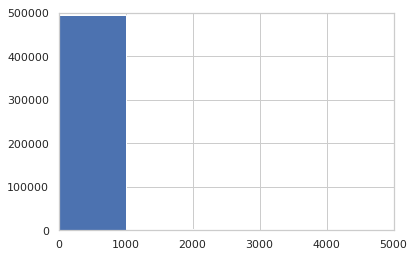

In [11]:
train_values.loan_amount.hist(bins=100)
plt.ylim([0.0,500000.0])
plt.xlim([0.0,5000.0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdee2548048>]],
      dtype=object)

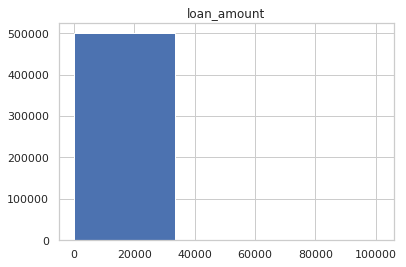

In [12]:
train_values.hist(column='loan_amount', bins=3)

In [13]:
 combined_train_data = train_values.merge(train_labels, left_index=True, right_index=True)

In [14]:
combined_train_data.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [15]:
df = combined_train_data[combined_train_data.applicant_ethnicity == 4]
df['accepted'].mean()

0.789310878157759

In [16]:
df = combined_train_data[combined_train_data.applicant_ethnicity == 1]
df['accepted'].mean()

0.427413324938019

In [17]:
df = combined_train_data[combined_train_data.applicant_sex == 1]
df['accepted'].mean()

0.520822910267696

In [18]:
df = combined_train_data[combined_train_data.applicant_sex == 2]
df['accepted'].mean()

0.46645342814748453

In [19]:
combined_train_data.columns

Index(['loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')

In [20]:
state_45_income = combined_train_data[combined_train_data.state_code == 45]['applicant_income']
state_45_amount = combined_train_data[combined_train_data.state_code == 45]['loan_amount']

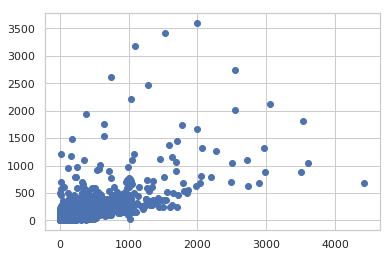

In [21]:
plt.scatter(x=state_45_amount, y=state_45_income)
plt.show()

In [22]:
state_45_income.corr(state_45_amount)

0.6299807976879395

In [23]:
df = combined_train_data[combined_train_data.state_code == 48]
df = df.groupby('county_code')['accepted'].mean()

In [24]:
df.head()

county_code
-1     0.120000
 2     0.455882
 3     0.513158
 10    0.643836
 11    0.390244
Name: accepted, dtype: float64

In [25]:
combined_train_data.county_code.unique

<bound method Series.unique of row_id
0         246
1         299
2         306
3         180
4          20
5          55
6         131
7          35
8          20
9          20
10        244
11         55
12          3
13        250
14        210
15        313
16         80
17         59
18        180
19         49
20        208
21          3
22        131
23        203
24        180
25         80
26         -1
27         56
28         35
29         20
         ... 
499970    260
499971    313
499972    260
499973     98
499974    250
499975    115
499976    163
499977    307
499978    134
499979    208
499980    131
499981    129
499982    129
499983    129
499984    124
499985     79
499986    233
499987      3
499988     61
499989    165
499990    246
499991    296
499992    313
499993     45
499994    156
499995     -1
499996     98
499997    131
499998    149
499999    133
Name: county_code, Length: 500000, dtype: int64>

In [26]:
df = combined_train_data[(combined_train_data.state_code == 2) | (combined_train_data.state_code==4)]
df1 = df.groupby(['loan_type', 'state_code'])['accepted'].mean()
df2 = df['accepted'].mean()

In [27]:
df1

loan_type  state_code
1          2             0.435804
           4             0.569992
2          2             0.503708
           4             0.554178
3          2             0.531802
           4             0.639456
4          2             0.461240
           4             0.617647
Name: accepted, dtype: float64

In [28]:
df2

0.4903343840236295

In [29]:
train_df = train_values.merge(train_labels, left_index=True, right_index=True)
test_df = test_values

In [30]:
train_df.co_applicant = train_df.co_applicant.astype('int')
test_df.co_applicant = test_df.co_applicant.astype('int')

train_df.co_applicant.head()

row_id
0    0
1    0
2    0
3    1
4    0
Name: co_applicant, dtype: int64

In [31]:
train_df.replace({'msa_md': -1, 'state_code': -1, 'county_code': -1}, -999, inplace=True)
test_df.replace({'msa_md': -1, 'state_code': -1, 'county_code': -1}, -999, inplace=True)

<Figure size 432x288 with 0 Axes>

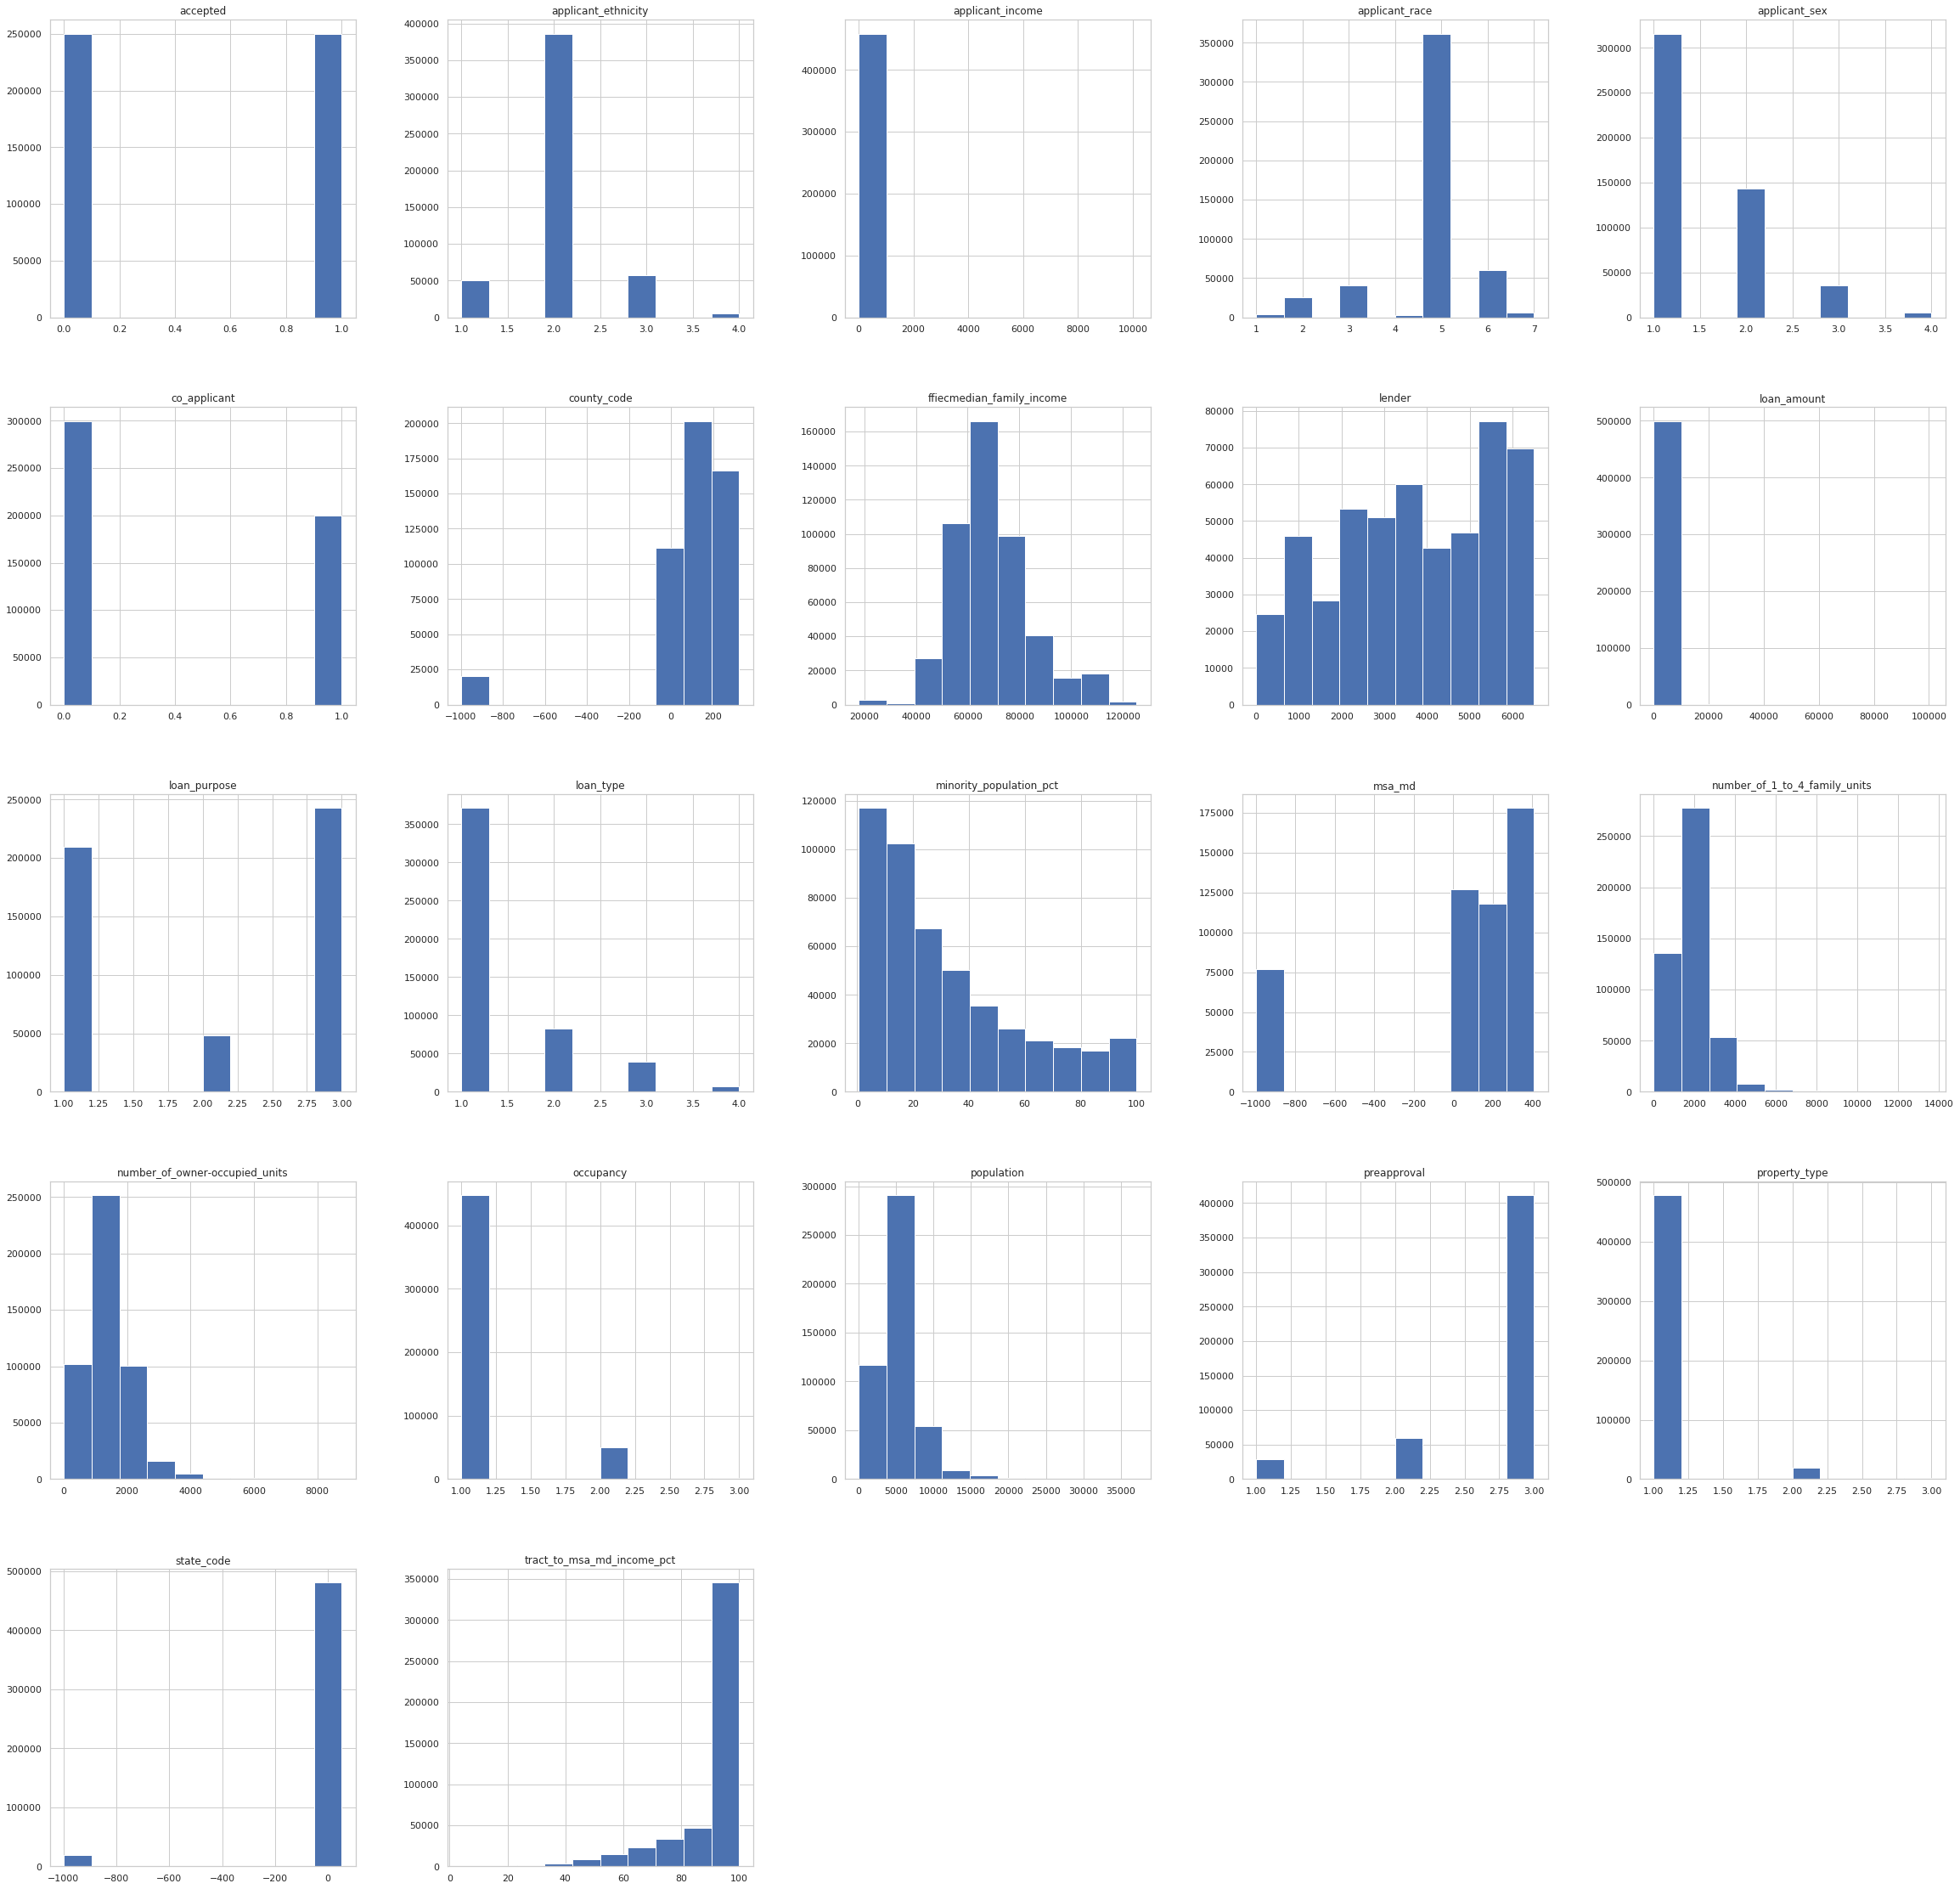

In [32]:
train_df.columns
histo=plt.figure()
histo=train_df.hist(figsize=(40,40))
plt.show()

In [33]:
desc=train_df.describe()
desc

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000,500000.000000
mean,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,27.950900,-14.460548,103.691926,2.036228,...,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.400052,0.500228
std,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,452.800849,196.969179,247.061555,0.511351,...,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.489909,0.500000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-999.000000,-999.000000,-999.000000,1.000000,...,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,...,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,...,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,0.000000,1.000000
75%,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,...,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000,1.000000
max,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,...,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000,1.000000


<Figure size 432x288 with 0 Axes>

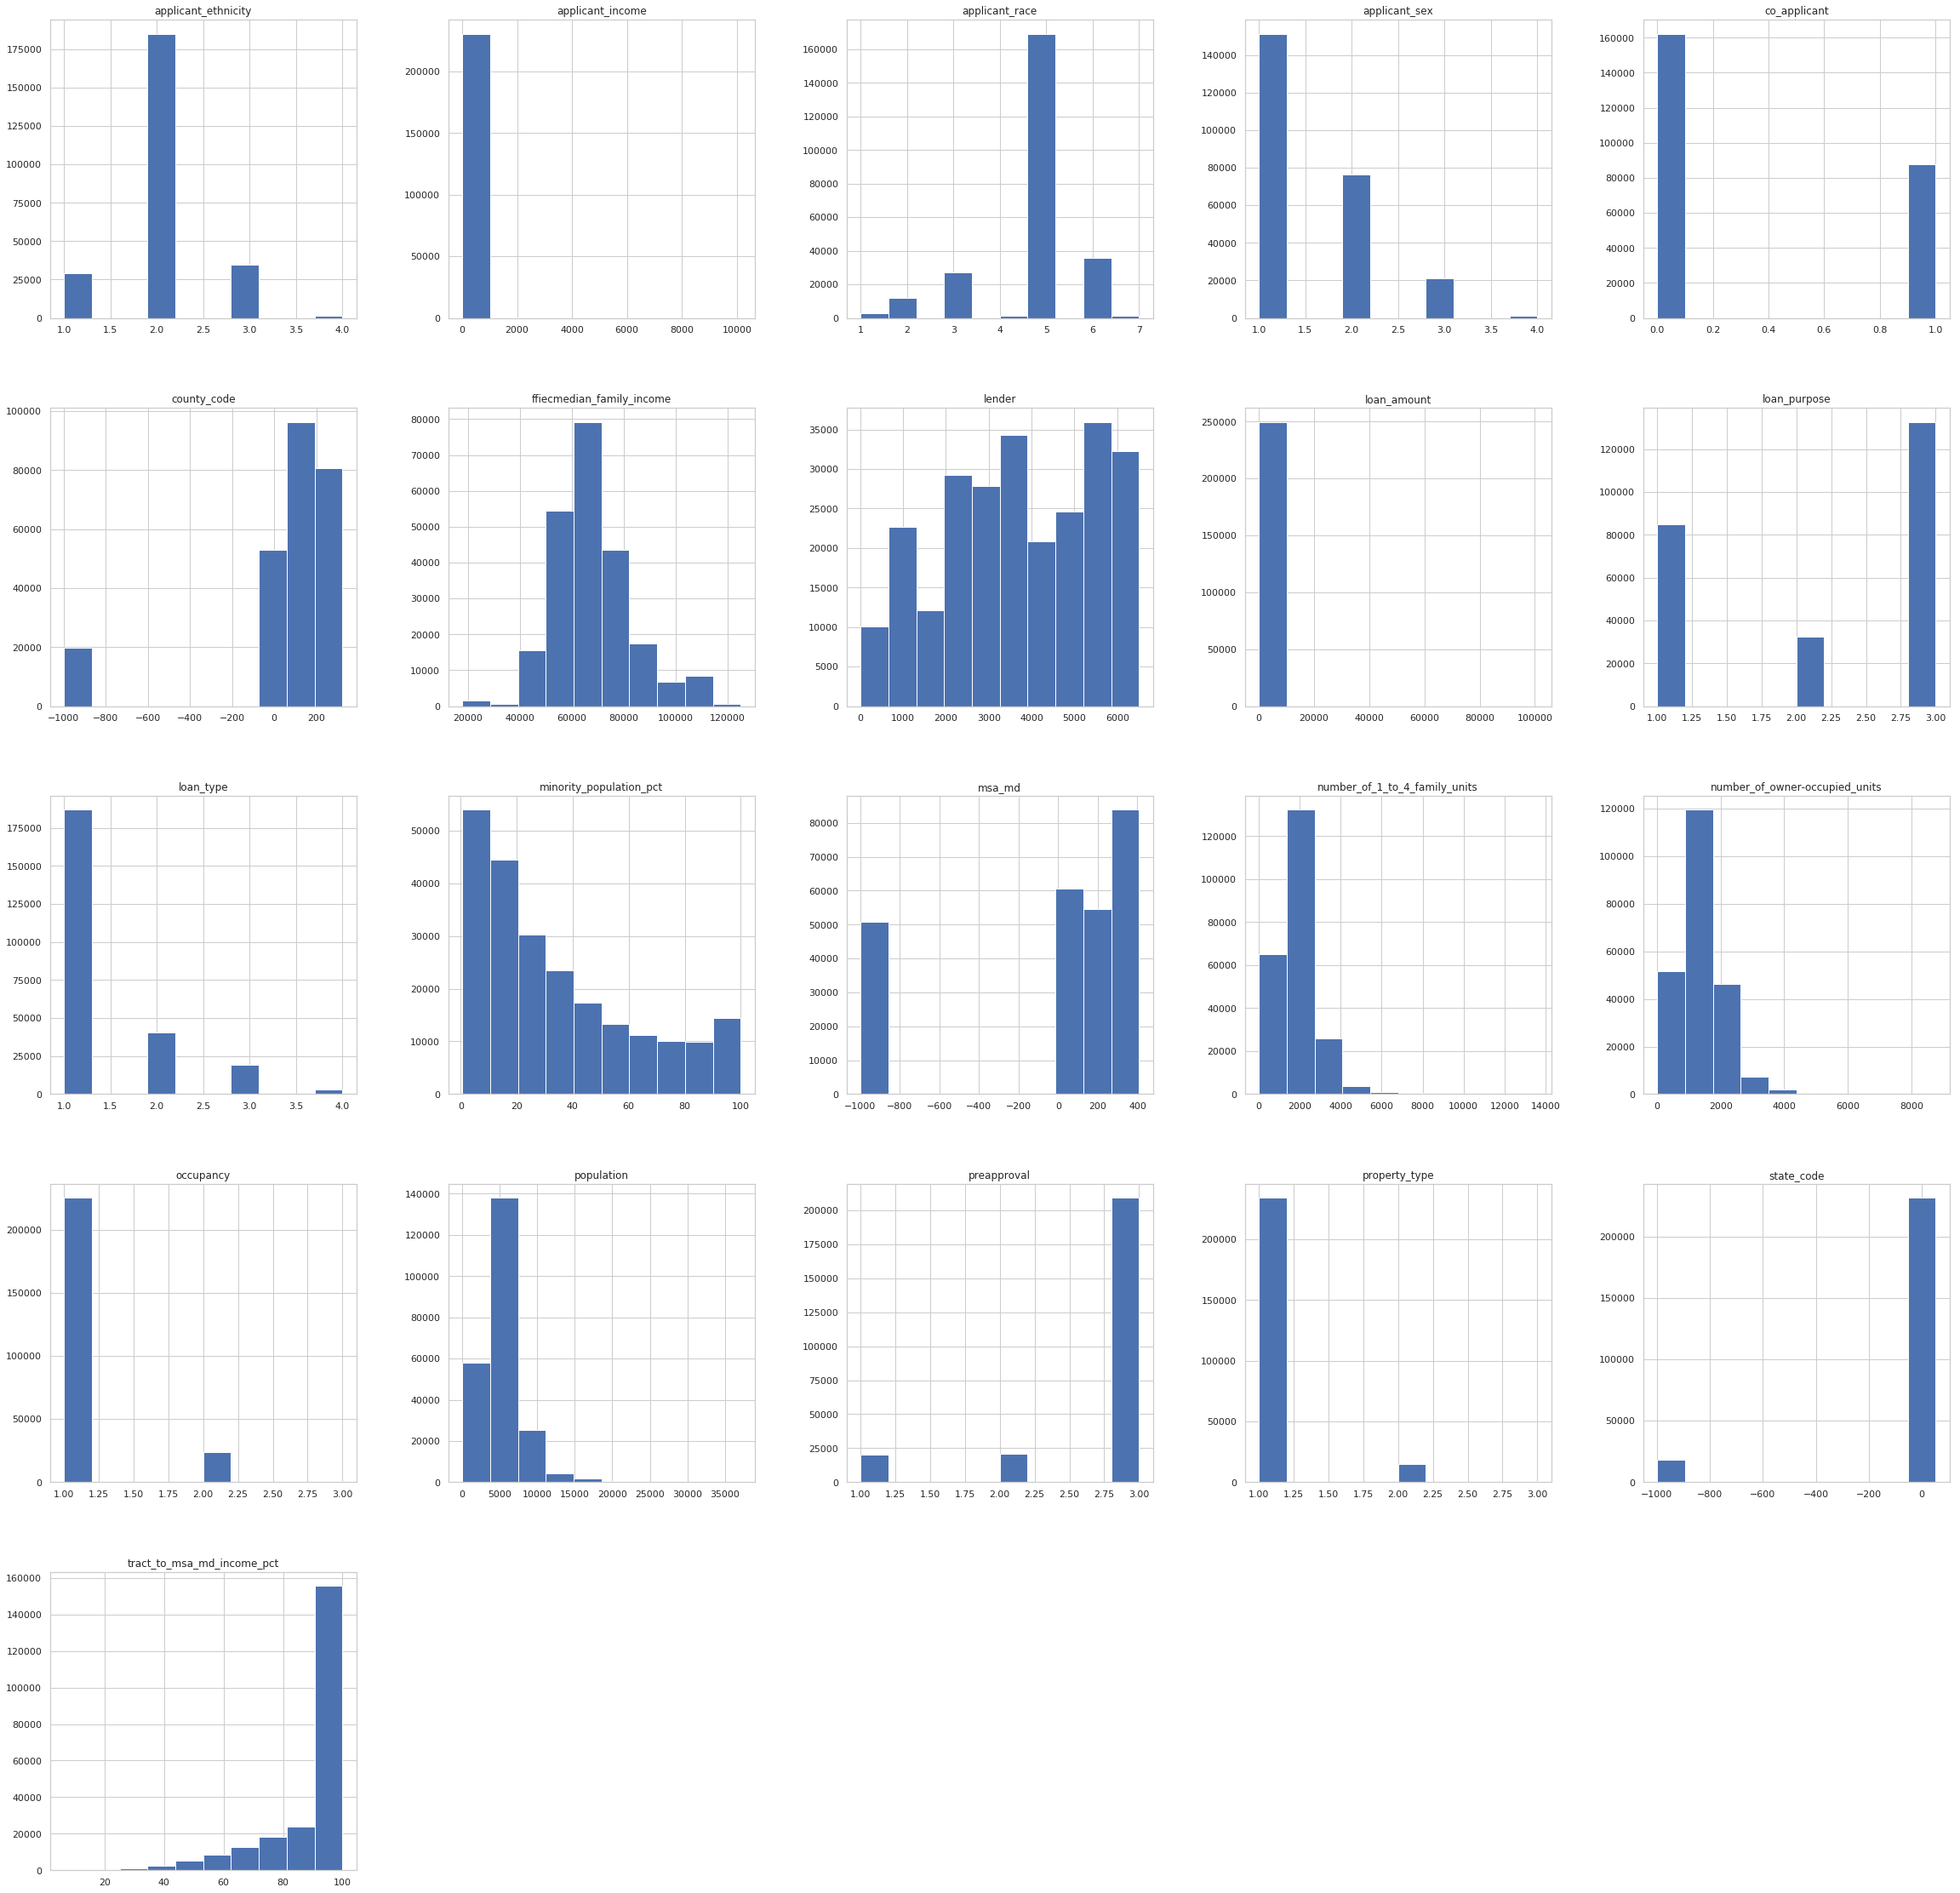

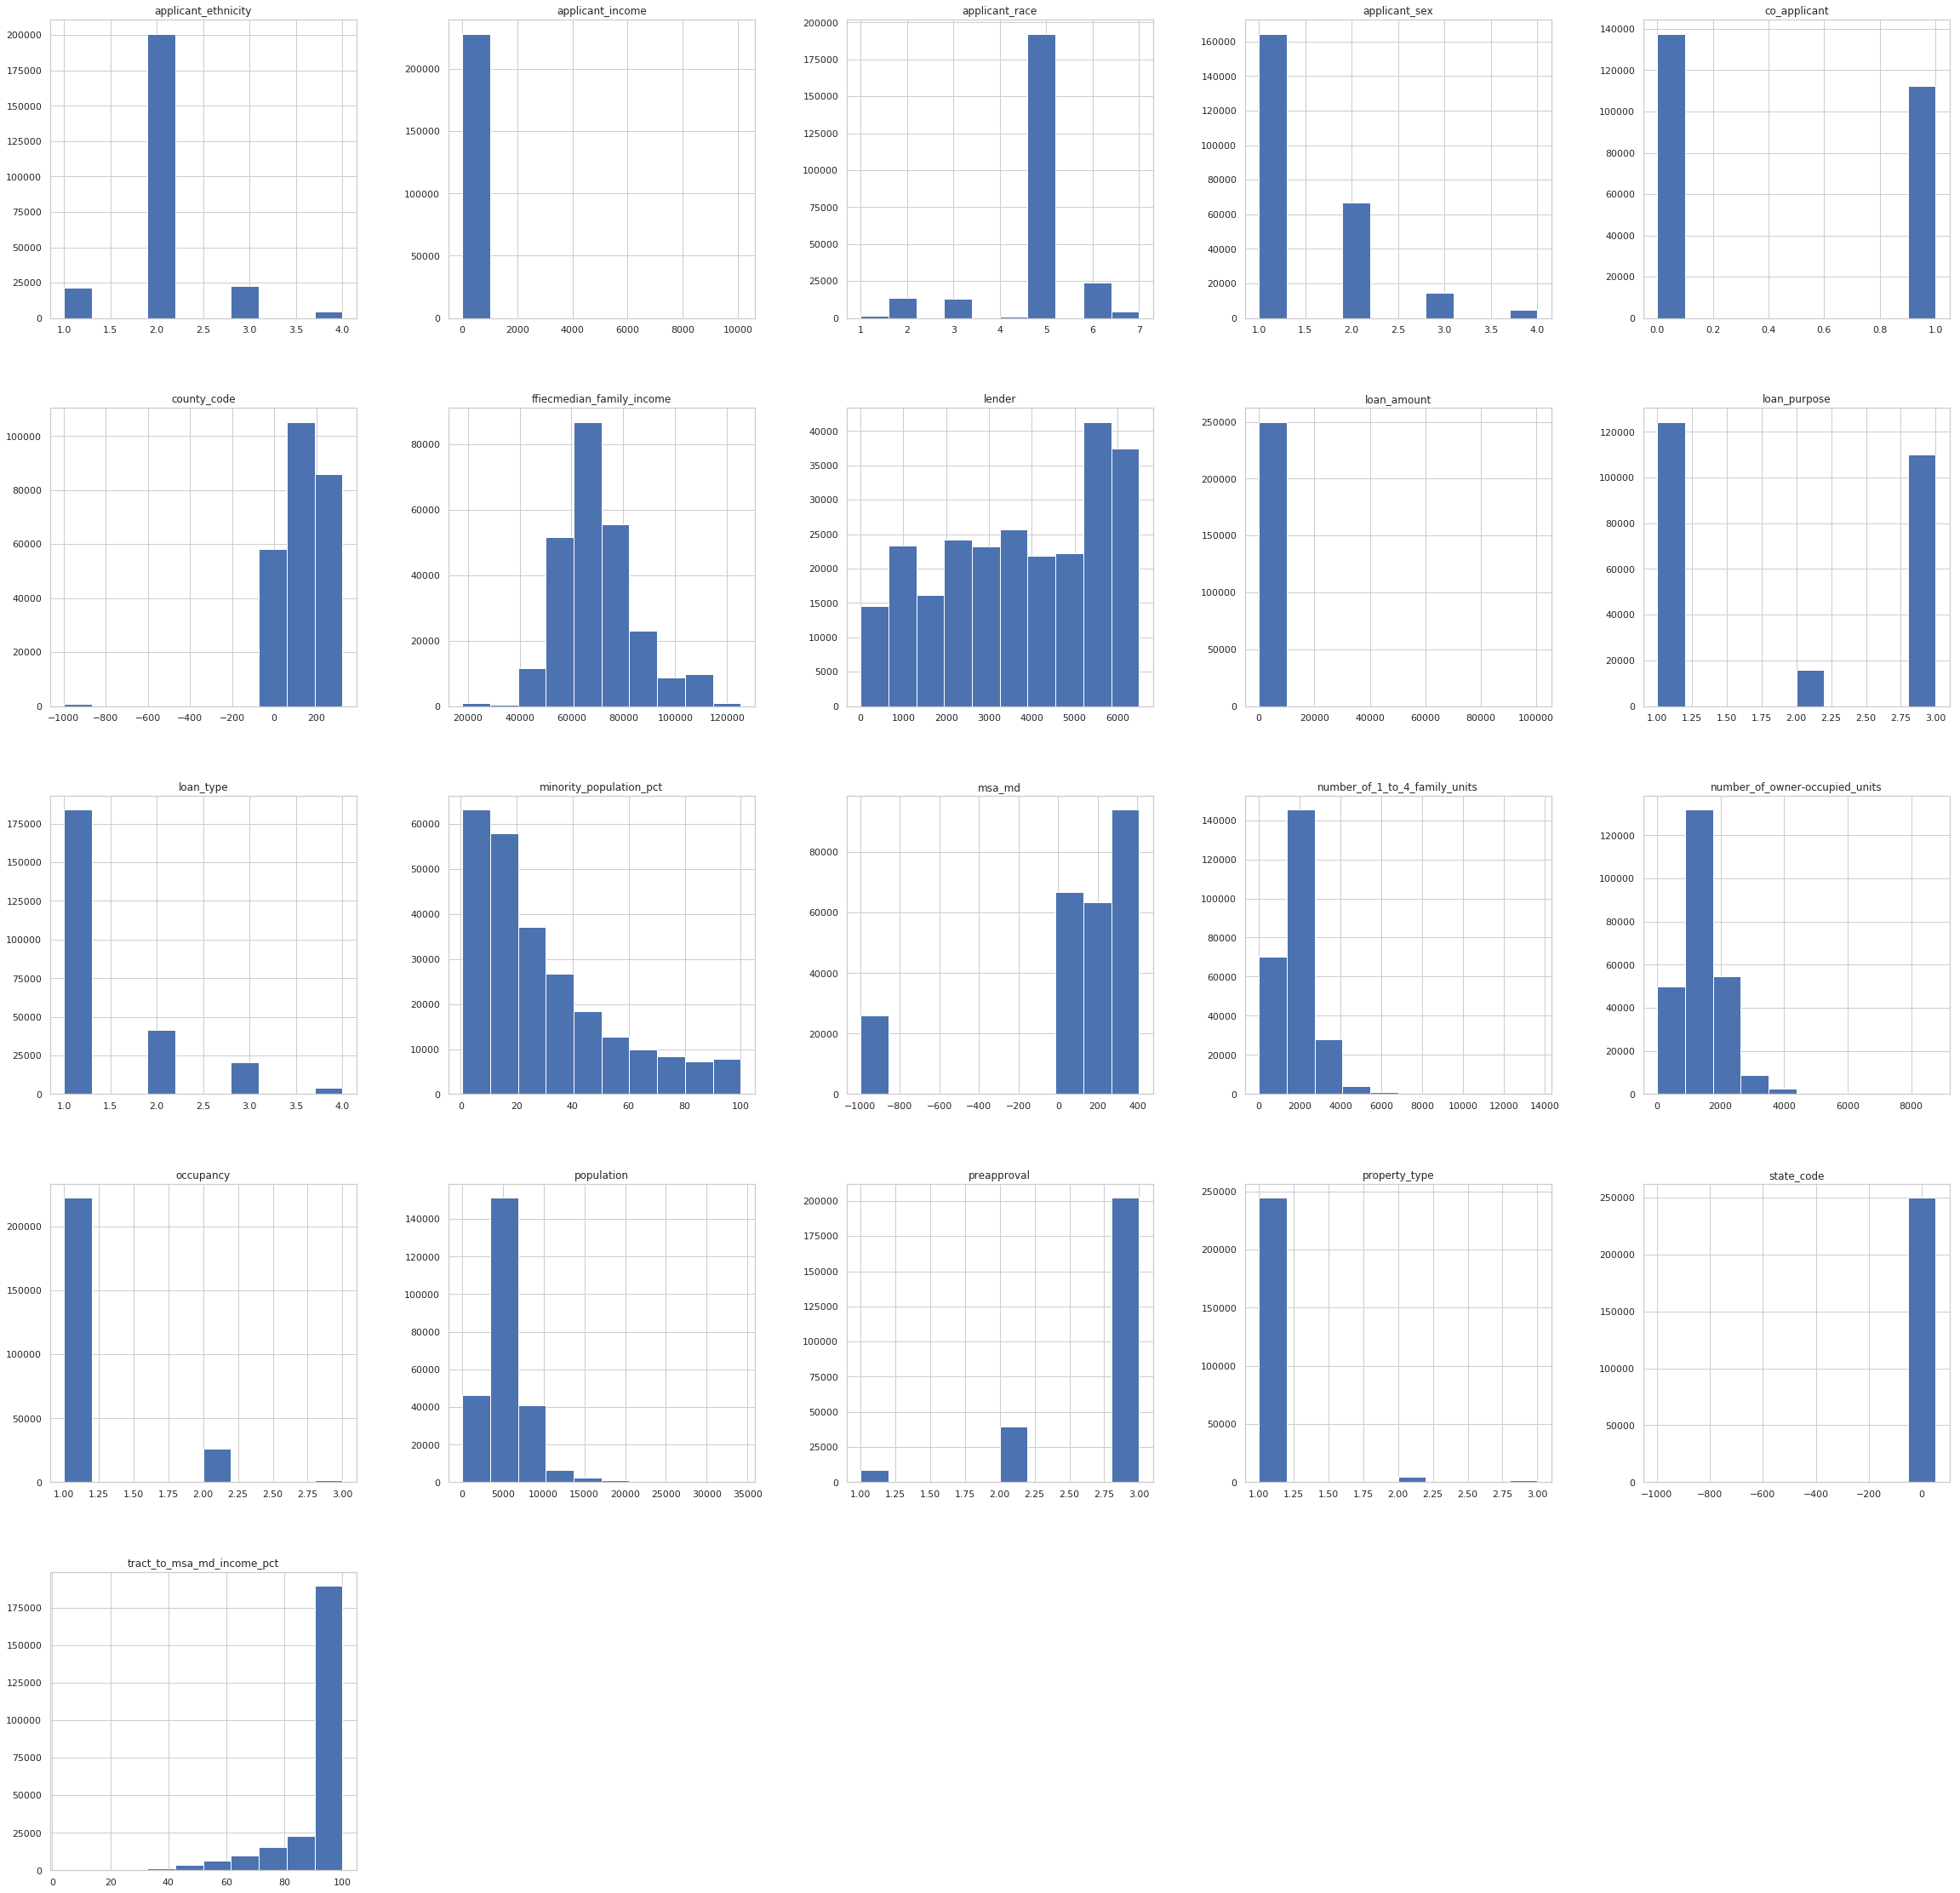

In [34]:
train_df.columns
histo=plt.figure()
histo=train_df.groupby('accepted').hist(figsize=(40,40))
plt.show()

In [35]:
desc=train_df.groupby('accepted').describe()
desc

loan_type                                              property_type  \
             count      mean       std  min  25%  50%  75%  max         count   
accepted                                                                        
0         249886.0  1.353433  0.675846  1.0  1.0  1.0  2.0  4.0      249886.0   
1         250114.0  1.379107  0.704713  1.0  1.0  1.0  2.0  4.0      250114.0   

                    ...  lender         co_applicant                           \
              mean  ...     75%     max        count      mean       std  min   
accepted            ...                                                         
0         1.066310  ...  5326.0  6508.0     249886.0  0.350492  0.477125  0.0   
1         1.029007  ...  5498.0  6508.0     250114.0  0.449567  0.497451  0.0   

                              
          25%  50%  75%  max  
accepted                      
0         0.0  0.0  1.0  1.0  
1         0.0  0.0  1.0  1.0  

[2 rows x 168 columns]

In [36]:
train_df.isna().sum()
# train_df.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

In [37]:
CATEGORY_LABELS = ['lender', 'msa_md', 'state_code', 'county_code', 'loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']
NUMERIC_LABELS = ['loan_amount', 'applicant_income', 'population', 'minority_population_pct', 'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

In [38]:
train_df[CATEGORY_LABELS]  = train_df[CATEGORY_LABELS].astype('category')
train_df[NUMERIC_LABELS] = train_df[NUMERIC_LABELS].fillna(-999)

test_df[CATEGORY_LABELS]  = test_df[CATEGORY_LABELS].astype('category')
test_df[NUMERIC_LABELS] = test_df[NUMERIC_LABELS].fillna(-999)

In [39]:
train_df.isna().sum()
# train_df.isnull().sum()

loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

Feature Engineering starts

In [40]:
df = train_df
df['occupancy']=np.where(df['occupancy'] == 3, 2, df['occupancy']) # categorise not applicable to be not occupied
df['preapproval']=np.where(df['preapproval'] == 3, 2, df['preapproval']) # categorise not applicable to be not requested

df['applicant_ethnicity']=np.where(df['applicant_ethnicity'] == 4, 3, df['applicant_ethnicity']) # categorise to be not  collected
df['applicant_ethnicity']=np.where(df['applicant_ethnicity'] == 5, 3, df['applicant_ethnicity']) # categorise to be not  collected

df['applicant_race']=np.where(df['applicant_race'] == 7, 6, df['applicant_race']) # categorise to be not  collected
df['applicant_race']=np.where(df['applicant_race'] == 8, 6, df['applicant_race']) # categorise to be not  collected

df['applicant_sex']=np.where(df['applicant_sex'] == 4, 3, df['applicant_sex']) # categorise to be not  collected
df['applicant_sex']=np.where(df['applicant_sex'] == 5, 3, df['applicant_sex']) # categorise to be not  collected

train_df = df



df = test_df
df['occupancy']=np.where(df['occupancy'] == 3, 2, df['occupancy']) # categorise not applicable to be not occupied
df['preapproval']=np.where(df['preapproval'] == 3, 2, df['preapproval']) # categorise not applicable to be not requested

df['applicant_ethnicity']=np.where(df['applicant_ethnicity'] == 4, 3, df['applicant_ethnicity']) # categorise to be not  collected
df['applicant_ethnicity']=np.where(df['applicant_ethnicity'] == 5, 3, df['applicant_ethnicity']) # categorise to be not  collected

df['applicant_race']=np.where(df['applicant_race'] == 7, 6, df['applicant_race']) # categorise to be not  collected
df['applicant_race']=np.where(df['applicant_race'] == 8, 6, df['applicant_race']) # categorise to be not  collected

df['applicant_sex']=np.where(df['applicant_sex'] == 4, 3, df['applicant_sex']) # categorise to be not  collected
df['applicant_sex']=np.where(df['applicant_sex'] == 5, 3, df['applicant_sex']) # categorise to be not  collected

test_df = df

In [41]:
train_df.applicant_race.unique()

array([5, 3, 6, 2, 1, 4])

Data Exploration

In [42]:
train_df['accepted'].value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

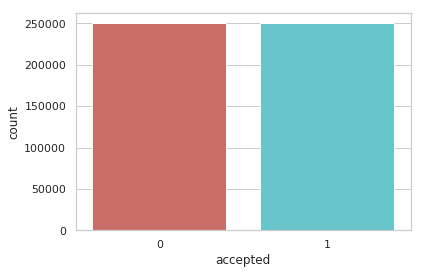

In [43]:
sns.countplot(x='accepted', data=train_df, palette='hls')
plt.show()

In [44]:
count_no_accepted = len(train_df[train_df['accepted'] == 0])
count_accepted = len(train_df[train_df['accepted'] == 1])

pct_of_no_accepted = count_no_accepted / (count_no_accepted + count_accepted)
print("percentage of not accepted is", pct_of_no_accepted*100)
pct_of_accepted = count_accepted/(count_no_accepted+count_accepted)
print("percentage of accepted", pct_of_accepted*100)

percentage of not accepted is 49.977199999999996
percentage of accepted 50.022800000000004


The classes looks balanced

In [45]:
train_df.groupby('accepted').mean()

,occupancy,loan_amount,preapproval,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units
accepted,,,,,,,,,,,,,
0,1.099313,194.352733,1.919059,2.026320,4.735419,1.483769,9.085815,4813.529421,-54.943038,62234.178285,-3.624467,1192.447056,1631.601622
1,1.111105,249.128605,1.965928,2.022862,4.815004,1.418309,19.695155,5443.324464,25.525571,69929.261361,89.011450,1443.839281,1880.569524


Text(0,0.5,'Frequency of Acceptance')

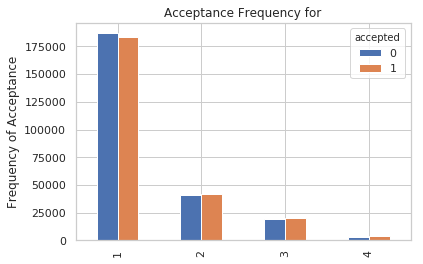

In [46]:
%matplotlib inline
pd.crosstab(train_df.loan_type,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

loan_type is not a good predictor

Text(0,0.5,'Frequency of Acceptance')

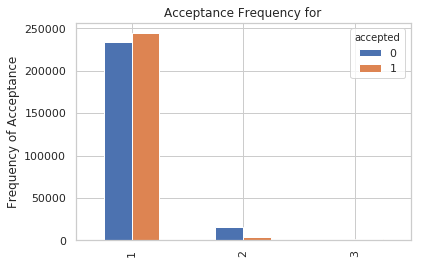

In [47]:
%matplotlib inline
pd.crosstab(train_df.property_type,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

property type affects

Text(0,0.5,'Frequency of Acceptance')

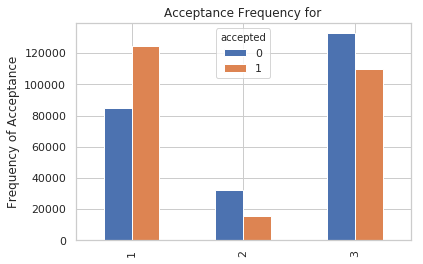

In [48]:
%matplotlib inline
pd.crosstab(train_df.loan_purpose,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

purpose affects

Text(0,0.5,'Frequency of Acceptance')

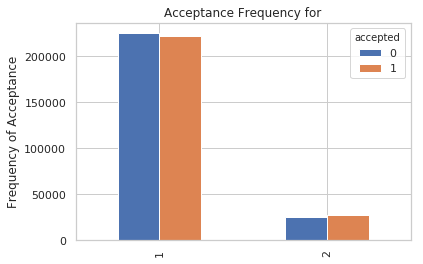

In [49]:
%matplotlib inline
pd.crosstab(train_df.occupancy,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

does not affect

Text(0,0.5,'Frequency of Acceptance')

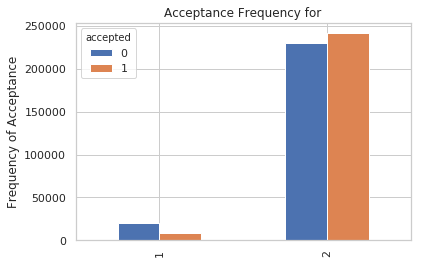

In [50]:
%matplotlib inline
pd.crosstab(train_df.preapproval,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

preappro val affects

Text(0,0.5,'Frequency of Acceptance')

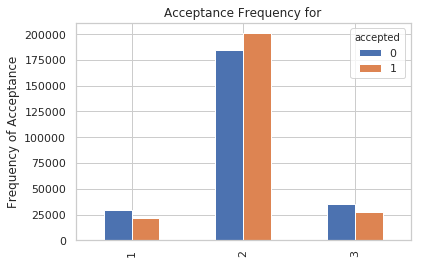

In [51]:
%matplotlib inline
pd.crosstab(train_df.applicant_ethnicity,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

Text(0,0.5,'Frequency of Acceptance')

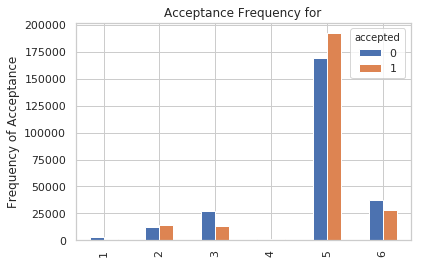

In [52]:
%matplotlib inline
pd.crosstab(train_df.applicant_race,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

Text(0,0.5,'Frequency of Acceptance')

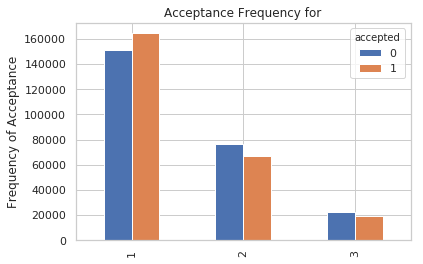

In [53]:
%matplotlib inline
pd.crosstab(train_df.applicant_sex,train_df.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for')
plt.xlabel('')
plt.ylabel('Frequency of Acceptance')

this affects decisions

In [54]:
cat_vars = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']

In [55]:
for var in cat_vars:
    cat_list_train='var'+'_'+var
    cat_list_train = pd.get_dummies(train_df[var], prefix=var)
    data1=train_df.join(cat_list_train)
    train_df=data1
    
    
    cat_list_test='var'+'_'+var
    cat_list_test = pd.get_dummies(test_df[var], prefix=var)
    data2=test_df.join(cat_list_test)
    test_df=data2
    
    
data_vars= train_df.columns.values.tolist()
to_keep_train=[i for i in data_vars if i not in cat_vars]

data_vars_test= test_df.columns.values.tolist()
to_keep_test=[i for i in data_vars_test if i not in cat_vars]

In [56]:
print(len(to_keep_train))
print(len(to_keep_test))

41
40


In [57]:
data_final_train=train_df[to_keep_train]
data_final_test=test_df[to_keep_test]

In [58]:
# # Feature Scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(copy=True, feature_range=(0, 1))
# data_final_train[NUMERIC_LABELS] = sc.fit_transform(data_final_train[NUMERIC_LABELS])
# data_final_test[NUMERIC_LABELS] = sc.fit_transform(data_final_test[NUMERIC_LABELS])

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# data_final_train[NUMERIC_LABELS] = sc.fit_transform(data_final_train[NUMERIC_LABELS])
# data_final_test[NUMERIC_LABELS] = sc.fit_transform(data_final_test[NUMERIC_LABELS])

In [59]:
data_final_train = pd.DataFrame(data_final_train, columns=to_keep_train)
data_final_test = pd.DataFrame(data_final_test, columns=to_keep_test)

In [60]:
X = data_final_train.loc[:, data_final_train.columns != 'accepted']
y = data_final_train.loc[:, data_final_train.columns == 'accepted']

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [62]:
fit_params={"early_stopping_rounds":20, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

In [63]:
import lightgbm as lgb
#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(num_leaves= 20, max_depth=10, 
                         random_state=42, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.03)

In [64]:
#force larger number of max trees and smaller learning rate
clf.fit(X_train, y_train, **fit_params)

/home/wilson/anaconda3/envs/kamikaze/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wilson/anaconda3/envs/kamikaze/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wilson/anaconda3/envs/kamikaze/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 20 rounds.
[100]	valid's auc: 0.78701
[200]	valid's auc: 0.794896
[300]	valid's auc: 0.798324
[400]	valid's auc: 0.800084
[500]	valid's auc: 0.800946
[600]	valid's auc: 0.801547
[700]	valid's auc: 0.801815
[800]	valid's auc: 0.802124
[900]	valid's auc: 0.802279
Early stopping, best iteration is:
[979]	valid's auc: 0.802483


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.03, max_depth=10,
               metric='None', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=20,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.9, subsample_for_bin=200000,
               subsample_freq=0)

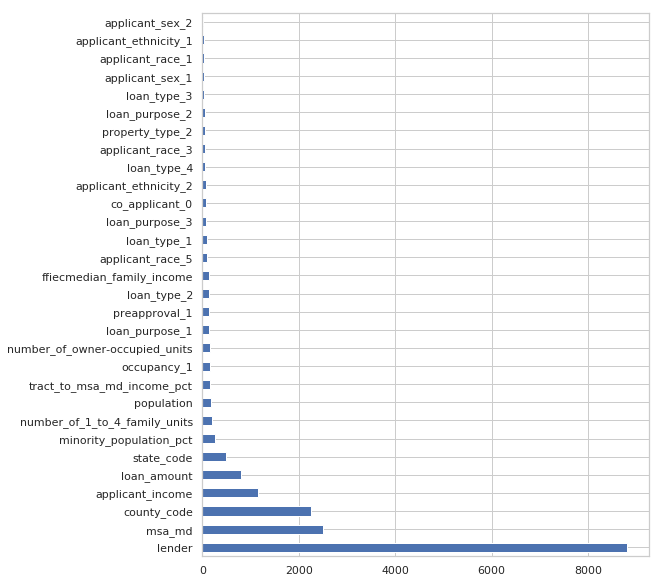

In [65]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [66]:
#Prediction
y_pred=clf.predict(X_test)
#convert into binary values
for i in range(0,99):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [67]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

print(cm)
print(accuracy)

[[41545 20697]
 [13679 49079]]
0.724992


In [68]:
#force larger number of max trees and smaller learning rate
clf.fit(X, y, **fit_params)

/home/wilson/anaconda3/envs/kamikaze/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/wilson/anaconda3/envs/kamikaze/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 20 rounds.
[100]	valid's auc: 0.792677
[200]	valid's auc: 0.805678
[300]	valid's auc: 0.812388
[400]	valid's auc: 0.817183
[500]	valid's auc: 0.820838
[600]	valid's auc: 0.823925
[700]	valid's auc: 0.826744
[800]	valid's auc: 0.829381
[900]	valid's auc: 0.832112
[1000]	valid's auc: 0.834218
Did not meet early stopping. Best iteration is:
[1000]	valid's auc: 0.834218


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.03, max_depth=10,
               metric='None', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=20,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.9, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
submission = pd.DataFrame()
submission['row_id'] = data_final_test.index
submission['accepted'] = clf.predict(data_final_test).astype('int')
submission.to_csv('../data/submission_early_stopping.csv', index=False)